In [1]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import plot_tools
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from numpy.random import RandomState

In [2]:
faces = fetch_olivetti_faces().data
n_samples, n_features = faces.shape
faces_centered = faces - faces.mean(axis=0)

In [3]:
faces_centered.shape

(400, 4096)

In [4]:
# data = fetch_olivetti_faces()
# targets = faces.target
# data = faces.images.reshape((len(data.images), -1))

# #test_idx = [1,  10, 29, 34, 87,  94, 78, 320]
# test_idx = [1, 87, 94, 78]
# train_idx = np.array(list(set(list(range(data.shape[0]))) - set(test_idx) ) )

# train_set = data[train_idx ]
# y_train = targets[train_idx] 
# test_set = data[np.array(test_idx)]
# y_test = targets[ np.array(test_idx)]
# testImage = test_set[0, :]
# print(data.shape, train_set.shape,test_set.shape, testImage.shape)

In [5]:
cov = np.cov(faces_centered, rowvar=False)

In [6]:
# centered_cov = np.matmul(faces_centered.T, faces_centered)/399
# print(np.allclose(centered_cov, centered_cov))

In [7]:
#print(np.allclose(centered_cov, centered_cov))

In [8]:
eigvals, principal_directions = np.linalg.eigh(cov)

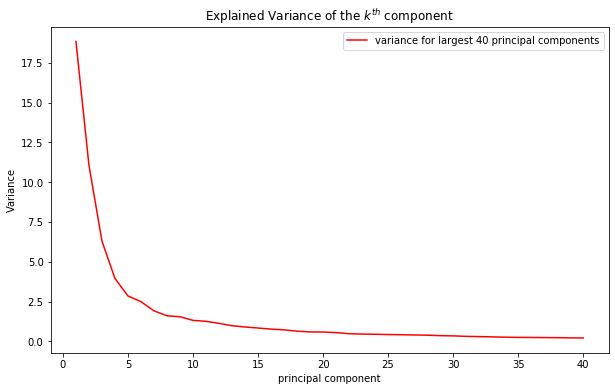

In [9]:
k = 40
truncated_eigvals = eigvals[::-1][:k]
fig, ax = plt.subplots(figsize=(10, 6))
k_range = range(1, k+1)
label_str = "variance for largest {} principal components".format(k)
ax.plot(k_range, truncated_eigvals, "-", color="red", label=label_str)
ax.set_xlabel("principal component")
ax.set_ylabel("Variance")
ax.set_title(r"Explained Variance of the $k^{th}$ component")
ax.legend()
plt.show();
fig.savefig("pb_4_b.pdf",bbox_inches='tight');

In [10]:
model = PCA(n_components=faces.shape[0], svd_solver="full")
model.fit(faces)
sigmas = model.singular_values_[:k]
sigmas 
# k = 40
# fig, ax = plt.subplots(figsize=(10, 6))
# k_range = range(1, k+1)
# ax.plot(k_range, sigmas, "-", color="red", label="variance for largest {} principal components".format(k))
# ax.set_xlabel("principal component")
# ax.set_ylabel("Variance")
# ax.set_title(r"Explained Variance of the $k^{th}$ component")
# ax.legend()
# plt.show();

array([86.70196  , 66.465294 , 50.15516  , 39.722527 , 33.757362 ,
       31.568716 , 27.678606 , 25.35455  , 24.862417 , 22.97515  ,
       22.440626 , 21.298521 , 19.83868  , 19.029678 , 18.317497 ,
       17.56838  , 17.033207 , 16.045593 , 15.426735 , 15.356079 ,
       14.8501835, 13.92934  , 13.5770035, 13.410839 , 13.130965 ,
       12.9575   , 12.735862 , 12.511105 , 12.0198145, 11.801412 ,
       11.265184 , 11.012787 , 10.6893   , 10.276612 , 10.056747 ,
        9.988402 ,  9.814746 ,  9.709448 ,  9.4375105,  9.3004675],
      dtype=float32)

In [11]:
(sigmas ** 2) / (400 - 1) * 1/eigvals[::-1][:40]

array([0.99999989, 1.00000052, 0.99999952, 1.00000007, 0.99999874,
       0.99999762, 0.99999999, 1.00000117, 1.00000004, 1.00000022,
       1.00000049, 0.9999996 , 1.00000146, 1.00000088, 1.00000103,
       1.00000031, 1.00000036, 0.99999977, 1.0000007 , 1.00000052,
       1.00000051, 0.99999986, 1.00000021, 0.99999962, 1.00000056,
       1.00000068, 1.00000044, 0.9999999 , 1.0000001 , 1.00000013,
       1.00000015, 0.99999986, 1.00000016, 1.00000025, 1.00000007,
       1.00000028, 0.99999975, 1.00000013, 1.00000005, 1.00000006])

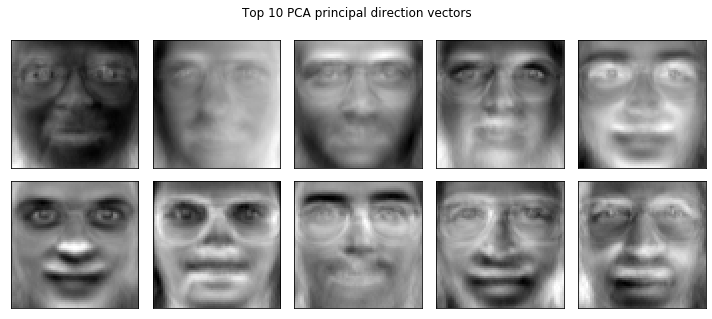

In [12]:
k =10
title = "Top {} PCA principal direction vectors".format(k)
plot_tools.plot_image_grid(model.components_[:k], title)

In [27]:
model.components_[:3]

array([[-0.00419107, -0.00710951, -0.0093361 , ...,  0.0001852 ,
         0.0033797 ,  0.0031883 ],
       [-0.02859127, -0.03328845, -0.03784652, ...,  0.02962781,
         0.02721298,  0.02488896],
       [ 0.00135701, -0.00032572, -0.00019797, ..., -0.01541374,
        -0.01370987, -0.01188349]], dtype=float32)

In [49]:
print(np.allclose(model.components_[:10], top_pd))

False


# Principal direction vectors

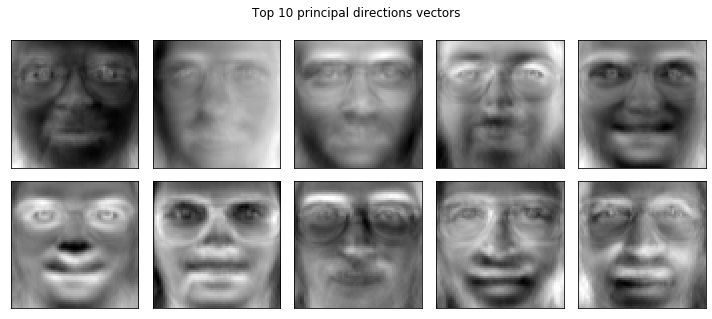

In [62]:
faces = fetch_olivetti_faces().data
n_samples, n_features = faces.shape
faces_centered = faces - faces.mean(axis=0)
cov = np.cov(faces_centered, rowvar=False)
_, principal_directions = np.linalg.eigh(cov)
k = 10
top_pd = principal_directions[:, ::-1][:,:k].T
title = "Top {} principal directions vectors".format(k)
plot_tools.plot_image_grid(top_pd, title)

# PC Nearest Neighbors

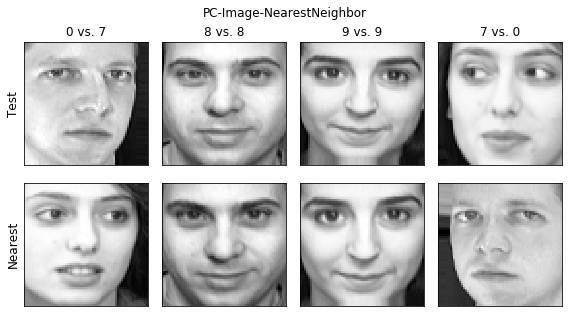

In [51]:
def compute_nearest_neighbors(train_matrix, testImage):
    distances = np.sqrt(np.sum((train_matrix - testImage) ** 2, axis=1))
    idx_of_closest_point_in_train_matrix = np.argsort(distances)
    return idx_of_closest_point_in_train_matrix[0]

test_idx = [1, 87, 94, 78]

faces = fetch_olivetti_faces()
targets = faces.target
faces = faces.images.reshape((len(faces.images), -1))

train_idx = np.array(list(set(list(range(faces.shape[0]))) - set(test_idx)))

train_set = faces[train_idx]
y_train = targets[train_idx]
test_set = faces[np.array(test_idx)]
y_test = targets[np.array(test_idx)]

k = 40
model = PCA(n_components=k)
model.fit(faces);

top_principal_components = model.components_

projected_train_set = train_set.dot(top_principal_components.T)
projected_test_set = test_set.dot(top_principal_components.T)

imgs = list()
est_labels = list()
for i in range(projected_test_set.shape[0]):
    test_image = projected_test_set[i, :]
    nnIdx = compute_nearest_neighbors(projected_train_set, test_image)
    imgs.extend([test_set[i,:], train_set[nnIdx, :]])
    est_labels.append(y_train[nnIdx])

row_titles = ['Test', 'Nearest']
col_titles = ['%d vs. %d' % (i, j) for i, j in zip(y_test, est_labels)]
plot_tools.plot_image_grid(imgs,
                               "PC-Image-NearestNeighbor",
                               (64, 64), len(projected_test_set), 
                           n_row=2, bycol=True, row_titles=row_titles, col_titles=col_titles)


In [57]:
projected_face = model.transform(faces)
projected_face_2 = faces_centered.dot(top_principal_components.T)

In [58]:
projected_face[0, :]

array([-6.432615  , -0.70366406, -1.4300246 ,  1.2785345 ,  2.5643973 ,
       -0.950589  ,  2.0817804 , -2.9379508 , -0.37387893,  0.24310797,
       -1.3543732 ,  1.1725982 ,  0.3918797 ,  0.35793802,  0.7542962 ,
        0.27064812,  0.5156765 , -0.5967475 , -0.15547487, -0.28124434,
        0.13594422,  0.7348241 , -0.12678552,  0.42633855,  0.5019902 ,
       -0.5105484 ,  0.72118   , -0.14895347, -0.03356779,  0.590622  ,
       -0.51205456,  0.30508626, -0.07089813,  0.81008697,  0.15465048,
        0.23880067, -0.2889833 , -0.59325355, -0.40821204,  0.4045596 ],
      dtype=float32)

In [59]:
projected_face_2[0,:]

array([-6.432615  , -0.70366406, -1.4300246 ,  1.2785345 ,  2.5643973 ,
       -0.950589  ,  2.0817804 , -2.9379508 , -0.37387893,  0.24310797,
       -1.3543732 ,  1.1725982 ,  0.3918797 ,  0.35793802,  0.7542962 ,
        0.27064812,  0.5156765 , -0.5967475 , -0.15547487, -0.28124434,
        0.13594422,  0.7348241 , -0.12678552,  0.42633855,  0.5019902 ,
       -0.5105484 ,  0.72118   , -0.14895347, -0.03356779,  0.590622  ,
       -0.51205456,  0.30508626, -0.07089813,  0.81008697,  0.15465048,
        0.23880067, -0.2889833 , -0.59325355, -0.40821204,  0.4045596 ],
      dtype=float32)

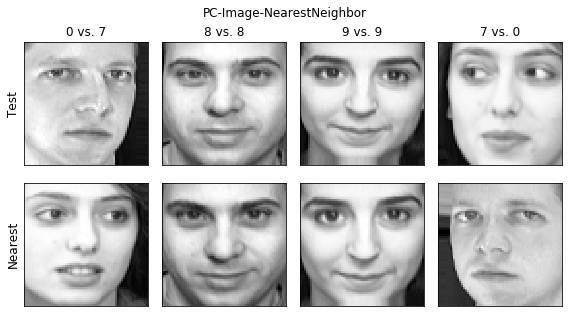

In [61]:
test_idx = [1, 87, 94, 78]

faces = fetch_olivetti_faces()
targets = faces.target
faces = faces.images.reshape((len(faces.images), -1))
train_idx = np.array(list(set(list(range(faces.shape[0]))) - set(test_idx)))

train_set = faces[train_idx]
y_train = targets[train_idx]
test_set = faces[np.array(test_idx)]
y_test = targets[np.array(test_idx)]


k = 40
model = PCA(n_components=k)
model.fit(faces);
projected_faces = model.transform(faces)

top_principal_components = model.components_

train_idx = np.array(list(set(list(range(projected_faces.shape[0]))) - set(test_idx)))
projected_train_set = train_set.dot(top_principal_components.T)
projected_test_set = test_set.dot(top_principal_components.T)

imgs = list()
est_labels = list()
for i in range(projected_test_set.shape[0]):
    test_image = projected_test_set[i, :]
    nnIdx = compute_nearest_neighbors(projected_train_set, test_image)
    imgs.extend([test_set[i,:], train_set[nnIdx, :]])
    est_labels.append(y_train[nnIdx])

row_titles = ['Test', 'Nearest']
col_titles = ['%d vs. %d' % (i, j) for i, j in zip(y_test, est_labels)]
plot_tools.plot_image_grid(imgs,
                               "PC-Image-NearestNeighbor",
                               (64, 64), len(projected_test_set), 
                           n_row=2, bycol=True, row_titles=row_titles, col_titles=col_titles)

# KMeans

In [ ]:
rng = RandomState(0)
center = True
n_components = 40

faces = fetch_olivetti_faces().data
faces_centered = faces - faces.mean(axis=0)
estimator =  KMeans(n_clusters=n_components, random_state=rng)
estimator.fit(faces)
kmeans_components = estimator.cluster_centers_
plot_tools.plot_image_grid(kmeans_components, "KMEANS_clusters", (64, 64), 10, n_row=4, bycol=True)

In [ ]:
kmeans_components.shape

In [ ]:
def plot_gallery(title, images, n_col,n_row, image_shape = (64, 64), cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

In [ ]:
len(kmeans_components)

In [ ]:
n_row, n_col = 4, 10
plot_gallery('Test', kmeans_components, n_col=n_col, n_row=n_row)

In [ ]:
plot_tools.plot_image_grid(kmeans_components, "KMEANS-Image-NearestNeighbor", (64, 64), 10, n_row=4, bycol=True)

In [ ]:
y = np.arange(35).reshape(5,7)

In [ ]:
y

In [ ]:
y[:, -3:]